# loading modules

In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from model import scVI_final as scVI
from benchmarking import *
from helper import *

# parameters

In [2]:
learning_rate = 0.0004
epsilon = 0.01

# import data

In [3]:
# expression data
data_path = "/home/ubuntu/single-cell-scVI/data/Zeisel/"
expression_train = np.loadtxt(data_path + "data_train")
expression_test = np.loadtxt(data_path + "data_test")

# zero masked matrix
X_zero, i, j, ix = \
        np.load(data_path + "imputation/X_zero.npy"), np.load(data_path + "imputation/i.npy"),\
        np.load(data_path + "imputation/j.npy"), np.load(data_path + "imputation/ix.npy")
#labels
c_train = np.loadtxt(data_path + "label_train")
c_test = np.loadtxt(data_path + "label_test")

# Computational graph

In [5]:
# getting priors
log_library_size = np.log(np.sum(expression_train, axis=1))
mean, var = np.mean(log_library_size), np.var(log_library_size)

In [ ]:
res = np.zeros((5, 6, 3))
latent_d = [2, 5, 7, 10, 15, 20]
for j, d in enumerate(latent_d):
    for t in range(5):
        tf.reset_default_graph()
        expression = tf.placeholder(tf.float32, (None, expression_train.shape[1]), name='x')
        kl_scalar = tf.placeholder(tf.float32, (), name='kl_scalar')
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate, epsilon=epsilon)
        training_phase = tf.placeholder(tf.bool, (), name='training_phase')
        model = scVI.scVIModel(expression=expression, kl_scale=kl_scalar, \
                                 optimize_algo=optimizer, phase=training_phase, \
                                  library_size_mean=mean, library_size_var=var, n_latent=d)

        # Session creation
        sess = tf.Session()
        sess.run(tf.global_variables_initializer())

        result = train_model(model, (expression_train, expression_test), sess, 250)

        dic_full = {expression: expression_train, training_phase:False}
        latent = sess.run(model.z, feed_dict=dic_full)
        res[t, j] = cluster_scores(latent, 7, c_train)

Running scVI on 558 genes
scVI will run without batch correction
Will work on mode numeric for incorporating library size
Will work on mode gene for modeling inverse dispersion param
Will apply zero inflation
1 hidden layers at 128 each for a final 2 latent space
Running scVI on 558 genes
scVI will run without batch correction
Will work on mode numeric for incorporating library size
Will work on mode gene for modeling inverse dispersion param
Will apply zero inflation
1 hidden layers at 128 each for a final 2 latent space
Running scVI on 558 genes
scVI will run without batch correction
Will work on mode numeric for incorporating library size
Will work on mode gene for modeling inverse dispersion param
Will apply zero inflation
1 hidden layers at 128 each for a final 2 latent space
Running scVI on 558 genes
scVI will run without batch correction
Will work on mode numeric for incorporating library size
Will work on mode gene for modeling inverse dispersion param
Will apply zero inflation

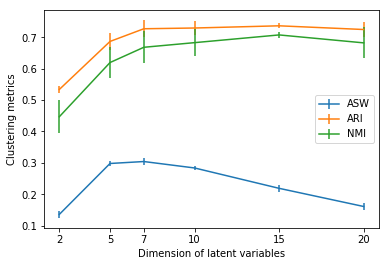

In [14]:
import numpy as np
import matplotlib.pyplot as plt

N = 8

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

label = ["ASW", "ARI", "NMI"]

fig, ax = plt.subplots()
for i in [0, 1, 2]:
    ax.errorbar(latent_d, np.mean(res[:, :, i], axis=0), yerr=np.std(res[:, :, i], axis=0), label=label[i])

# add some text for labels, title and axes ticks
ax.set_ylabel('Clustering metrics')
ax.set_xticks(latent_d)
ax.set_xlabel("Dimension of latent variables")
plt.legend()

#plt.savefig("zeiler_clustering_dimension_stability.pdf", dpi=300)

plt.show()

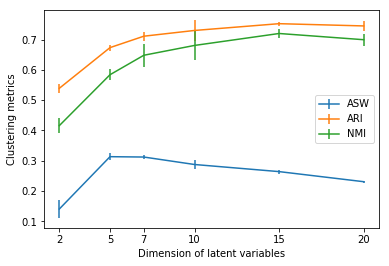

In [8]:
import numpy as np
import matplotlib.pyplot as plt

N = 8

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

label = ["ASW", "ARI", "NMI"]

fig, ax = plt.subplots()
for i in [0, 1, 2]:
    ax.errorbar(latent_d, np.mean(res[:, :, i], axis=0), yerr=np.std(res[:, :, i], axis=0), label=label[i])

# add some text for labels, title and axes ticks
ax.set_ylabel('Clustering metrics')
ax.set_xticks(latent_d)
ax.set_xlabel("Dimension of latent variables")
plt.legend()

plt.savefig("zeiler_clustering_dimension_stability.pdf", dpi=300)

plt.show()